# **Шаг 1.  Откройте файл с данными и изучите общую информацию.** 

##Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/real_estate_data.csv
Скачать датасет
Загрузите данные из файла в датафрейм.
Изучите общую информацию о полученном датафрейме.
Постройте общую гистограмму для всех числовых столбцов таблицы. Например, для датафрейма data это можно сделать командой data.hist(figsize=(15, 20)).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('/content/drive/MyDrive/DA/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

###*Исследованием этих данных я хочу выяснить все закономерности в объявлениях о продаже недвижимости. Это исследование поможет выявить в какие дни недели наибольшее количество новых объявлений, т.е. выбор больше. Также можно выявить связь стоимости кв. м. и, например, удаленности от центра города или парка. Чем больше данных будет исследованно, тем больше вероятность найти закономерности. Итогом этого исследования станет портрет среднестатистической квартиры.*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Отметила столбцы, в которых нужно изменить тип данных и обработать пропуски:**

last_price:               int

first_day_exposition:     datetime

ceiling_height:           NaN

floors_total:             NaN + int

living_area:              NaN

is_apartment:             NaN + bool

kitchen_area:             NaN

balcony:                  NaN + int

locality_name:            NaN

airports_nearest:         NaN

cityCenters_nearest:      NaN

parks_around3000:         NaN + int

parks_nearest:            NaN

ponds_around3000:         Nan + int

ponds_nearest:            NaN

days_exposition:          NaN + int

In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

###*Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до 
снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении*

In [ ]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


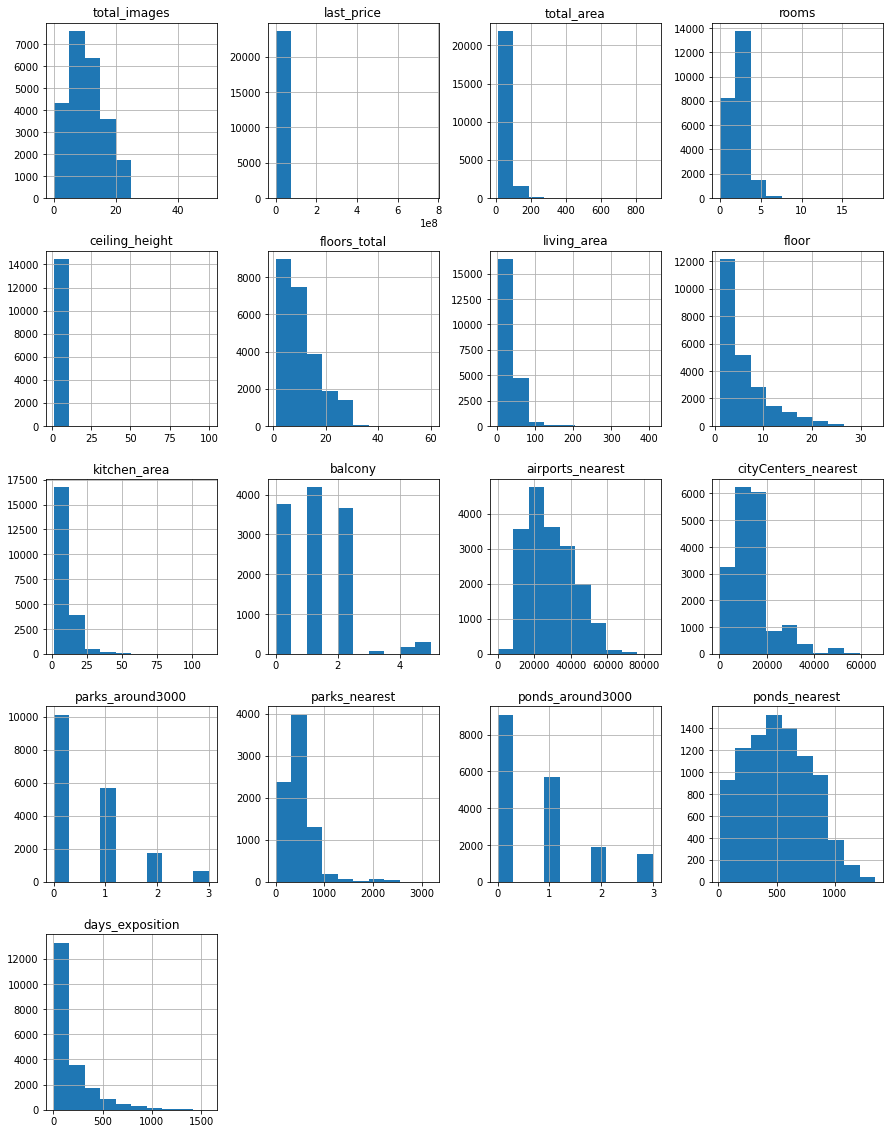

In [ ]:
df.hist(figsize=(15, 20))
plt.show()

*На гистограммах видны пики, а также аномалии, с которыми необходимо разобраться и привести данные в "чистый" вид. Например в "days_exposition" виден длинный "хвост", это повод тщательно проанализировать эти данные.*

# **Шаг 2. Предобработка данных**

**1. Найдите и изучите пропущенные значения в столбцах:

- Определите, в каких столбцах есть пропуски.
- Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
- В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.** 



**2. Рассмотрите типы данных в каждом столбце:
- Найдите столбцы, в которых нужно изменить тип данных.
- Преобразуйте тип данных в выбранных столбцах.
- В ячейке с типом markdown поясните, почему нужно изменить тип данных.**



In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
df['last_price'] = df['last_price'].astype('int')

*Для удобства, в столбце **'last_price'** я изменила тип данных на integer.*

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

*Заменила тип данных в столбце **'first_day_exposition'** на datatime, т.к. время не указано и для удобства оставила только дату в формате гг/мм/дд.*

In [ ]:
df['ceiling_height'].value_counts()

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

*Пропуски в столбце **'ceiling_height'** могли возникнуть в силу разных причин, скорее всего автор не заполнил данное поле. Поэтому заменила NaN на медианное значение, ввиду наличия выбросов.*

In [ ]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [ ]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median()).astype('int')

In [ ]:
# код 2
df[df['floors_total'] < df['floor']].shape[0]

37

*NaN в столбце **'floors_total'** - природа появления непонятна.
Поэтому заменила NaN на медианное значение, ввиду наличия выбросов. Тажке изменила тип данных на integer, т.к. этажи обычно целые числа.*

In [ ]:
df['living_area'].value_counts()

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

In [ ]:
def categorize_area(met):
    try:
        if met <= 30:
            return 'little'
        elif 31 <= met <= 60:
            return 'medium'
        elif 61 <= met <= 100:
            return 'large'
        elif 101 <= met:
            return 'x-large'
        else:
          return 'Other'
    except:
        pass
df['category_area'] = df['total_area'].apply(categorize_area)

In [ ]:
for t in df['category_area'].unique():
    df.loc[(df['category_area'] == t) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['category_area'] == t), 'living_area'].median()

*В столбце **'living_area'** я заменила NaN на медианное значение в аналогичной категории по общей площади, т.к. причины появления пропусков не ясны.*

In [ ]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype('bool')
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

*В столбце **'is_apartment'** много пропусков, возможно это связано с тем, что апартаменты не так давно стали продавать и раньше этого пункта просто небыло. Изменила все пропуски на False. Также я заменила тип данных на 'bool'.*

In [ ]:
df.loc[(df['kitchen_area'].isnull() & df['studio'] == True), 'kitchen_area'] = 0
for t in df['category_area'].unique():
    med = df.loc[(df['category_area'] == t), 'kitchen_area'].median()
    df.loc[(df['category_area'] == t) & (df['kitchen_area'].isna()), 'kitchen_area'] = med

df['kitchen_area'].isna().sum()

0

*Т.к. в столбце **'kitchen_area'** причины появления пропусков не ясны. Я заменила NaN на медианное значение в аналогичной категории по общей площади, кроме студий, в студиях кухни нет, поэтому там теперь 0.*

In [ ]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

*В столбце **'balcony'** я заменила NaN на 0, т.к. скорее всего, балкона в этом помещении нет.*

*Пропуски в столбце **'days_exposition'** могли возникнуть т.к. эти объявления были актуальны на момент выгрузки данных. Оставила без изменений.*

*В столбце **'locality_name'** я ничего не меняла, т.к. эти данные ни на что не влияют.*

*В столбцах **'airports_nearest', 'city_centers_nearest', '
parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'** я ничего не меняла, т.к. скорее всего эти опции были добавлены позже, чем публиковались объявления. И чтобы не навредить данным, оставила как есть.*

In [ ]:
df = df.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'})
df['city_centers_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
5278.0      1
11575.0     1
3205.0      1
12747.0     1
4234.0      1
Name: city_centers_nearest, Length: 7642, dtype: int64

Я переименовала столбец **'cityCenters_nearest'** в **'city_centers_nearest'**, чтобы убрать заглавную букву из названия.

**3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')

**4. Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.
Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
В противном случае удалите редкие и выбивающиеся значения.
В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.**

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

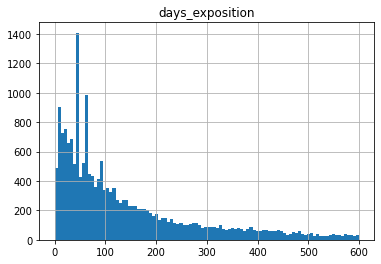

In [ ]:
df.hist('days_exposition', bins=100, range=(0, 600))

In [ ]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
df['days_exposition'].median()

95.0

На гистограмме **'days_exposition'** мы видим еще 4 пика - аномалии, происхождение которых, скорее всего, техническое. Возможно это как-то связано с автоматическим снятием объявления, т.к. это ровно 45, 60 и 90 день с момента публикации. Не удаляю эти аномалии потому , что они могут существенно повлиять на исследование, но буду учитывать их при расчетах.

In [ ]:
# код 2
df.shape[0] / 23699

1.0

In [ ]:
df['last_price'] = df['last_price']/1000

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

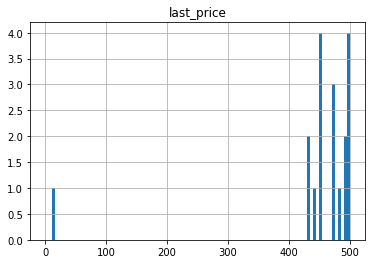

In [ ]:
df.hist('last_price', bins=100, range=(0, 500))
df['last_price'].describe()

In [ ]:
df = df.query('last_price > 13')

In [ ]:
df['last_price'].describe()

count     23698.000000
mean       6541.824295
std       10887.160351
min         430.000000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

Видим большие выбросы, но т.к. это цена, она может быть много чем обусловлена, а не просто ошибка. Отсекла только неправдоподобно низкую стоимость, вероятно это человеческая ошибка.

In [ ]:
df = df.reset_index(drop=True)
df.loc[df['ceiling_height'] > 20, 'ceiling_height'] = df.loc[df['ceiling_height'] > 20, 'ceiling_height'] / 10
df.loc[df['ceiling_height'] > 5, 'ceiling_height'] = df['ceiling_height'].median()
df.loc[df['ceiling_height'] < 2, 'ceiling_height'] = df['ceiling_height'].median()

In [ ]:
df['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48,
       2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59,
       2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 ,
       2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81,
       2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92,
       2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03,
       3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14,
       3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26,
       3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37,
       3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49,
       3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 ,
       3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78,
       3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95,
       3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.

В столбце **'ceiling_height'** встречались неправдоподобные значения, такие как 26 м и 60 м, таких потолков не бывает. Предположив, что это ошибка ввода, я разделила на 10, так многие значения приобрели правдоподобные значения. 

Далее, значения менее 2м и более 5м я заменила на медианное значение, т.к. высота потолков менее 2 м и более 5м в жилых помещениях не бывает.

<AxesSubplot:ylabel='Frequency'>

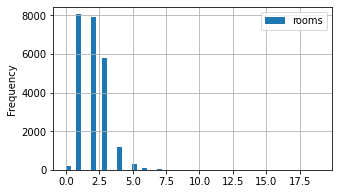

In [ ]:
df.plot(y = 'rooms', kind = 'hist', bins = 50, grid=True, figsize = (5,3))

В столбце **'rooms'** явных аномалий не нашла.

<AxesSubplot:ylabel='Frequency'>

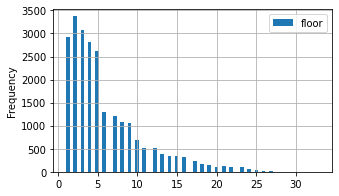

In [ ]:
df.plot(y = 'floor', kind = 'hist', bins = 70, grid=True, figsize = (5,3))

В столбце **'floor'** явных аномалий не нашла.

In [ ]:
df = df.query('floors_total < 38')

<AxesSubplot:ylabel='Frequency'>

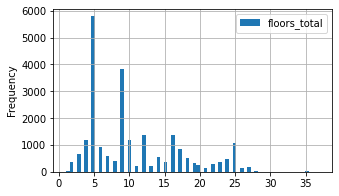

In [ ]:
df.plot(y = 'floors_total', kind = 'hist', bins = 70, grid=True, figsize = (5,3))

In [ ]:
df.loc[df['floors_total'] > 35]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_area
397,15,5990.0,54.0,2018-03-22,2,2.65,36,21.4,28,False,...,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,medium
5807,17,8150.0,80.0,2019-01-09,2,2.70,36,41.0,13,False,...,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,large
11078,16,9200.0,75.0,2019-02-22,2,2.70,36,40.0,29,False,...,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,large
16933,5,4100.0,40.0,2017-10-17,1,2.65,37,17.4,5,False,...,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,medium


В столбце **'floors_total'** убрала 2 аномальных значения, это 52 (Санкт-Петербург) и 60 (Кронштадт) этажей. В Санкт-Петербурге самое высокое жилое строение имеет 37 этажей, а Кронштадт и вовсе имеет только малоэтажную застройку.

# **Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:**

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [ ]:
df = df.reset_index(drop=True)
df['price_per_meter'] = df['last_price'] / df['total_area']
df['price_per_meter'] = df['price_per_meter'].round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_area,price_per_meter
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,x-large,120.37
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,medium,82.92
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,medium,92.79
3,0,64900.0,159.0,2015-07-24,3,2.65,14,76.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,x-large,408.18
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,large,100.00


Добавила столбец **'price_per_meter'** с ценой за метр квадратный, также я оставила 2 знака после запятой для удобства.

In [ ]:
df['day_week_exposition'] = df['first_day_exposition'].dt.weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_area,price_per_meter,day_week_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,x-large,120.37,3
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,medium,82.92,1
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,medium,92.79,3
3,0,64900.0,159.0,2015-07-24,3,2.65,14,76.0,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,x-large,408.18,4
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,large,100.00,1


Добавила столбец **'day_week_exposition'** с днями недели публикации объявления.

In [ ]:
df['month_exposition'] = df['first_day_exposition'].dt.month
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_area,price_per_meter,day_week_exposition,month_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,x-large,120.37,3,3
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,medium,82.92,1,12
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,medium,92.79,3,8
3,0,64900.0,159.0,2015-07-24,3,2.65,14,76.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,x-large,408.18,4,7
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,large,100.00,1,6


Добавила столбец **'month_exposition'** с месяцем публикации объявления.

In [ ]:
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_area,price_per_meter,day_week_exposition,month_exposition,year_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,x-large,120.37,3,3,2019
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,medium,82.92,1,12,2018
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,medium,92.79,3,8,2015
3,0,64900.0,159.0,2015-07-24,3,2.65,14,76.0,9,False,...,2.0,84.0,3.0,234.0,424.0,x-large,408.18,4,7,2015
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,large,100.00,1,6,2018


Добавила столбец **'year_exposition'** с годом публикации объявления.

In [ ]:
def floor_type(number):
    floor = number['floor']
    floors_total = number['floors_total']
    if floor == 1:
        return 'первый'
    elif number.loc['floor'] == number.loc['floors_total']:
        return 'последний'
    return 'другой'
df['floor_type'] = df[['floor', 'floors_total']].apply(floor_type, axis = 1)

Добавила столбец **'floor_type'** с типами этажей.

In [ ]:
df['city_centers_nearest'] = df['city_centers_nearest']/1000
df['city_centers_nearest'] = df['city_centers_nearest'].round()
df['city_centers_nearest'].head(100)

0     16.0
1     19.0
2     14.0
3      7.0
4      8.0
      ... 
95    14.0
96    16.0
97     NaN
98     9.0
99     3.0
Name: city_centers_nearest, Length: 100, dtype: float64

Я перевела значения столбца **'city_centers_nearest'** из метров в километры и округлила до целых чисел.

# **Шаг 4. Проведите исследовательский анализ данных:**

1. Изучите следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

count    23696.000000
mean        60.348083
std         35.654564
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

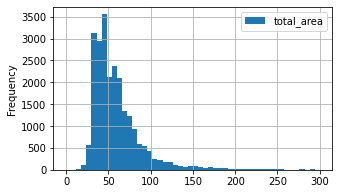

In [ ]:
df.plot(y='total_area', kind='hist', bins=50, range=(0,300),grid=True, figsize=(5,3))
df['total_area'].describe()

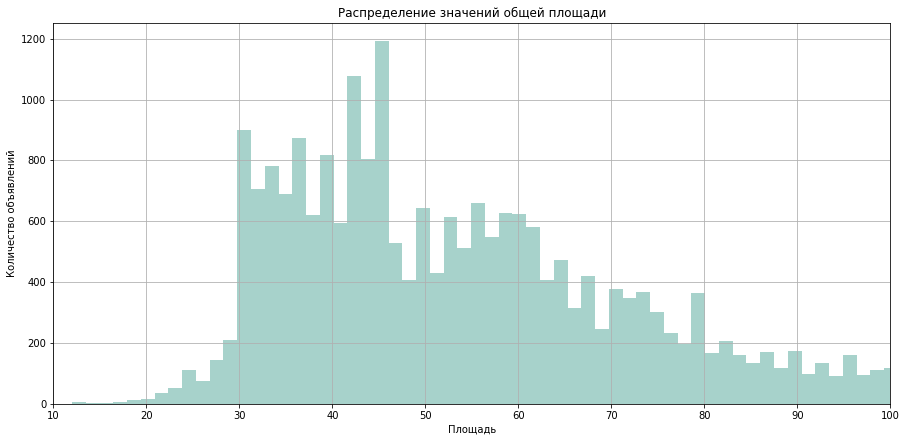

In [ ]:
# код ревьюера

df['total_area'].hist(bins = 600, figsize = (15, 7), color='#A7D2CB')
plt.xlim(10, 100)

plt.title('Распределение значений общей площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

count    23696.000000
mean        34.409991
std         21.635082
min          2.000000
25%         19.000000
50%         30.000000
75%         43.000000
max        409.700000
Name: living_area, dtype: float64

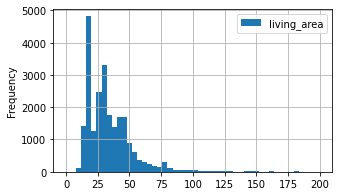

In [ ]:
df.plot(y='living_area', kind='hist', bins=50, range=(0,200),grid=True, figsize=(5,3))
df['living_area'].describe()

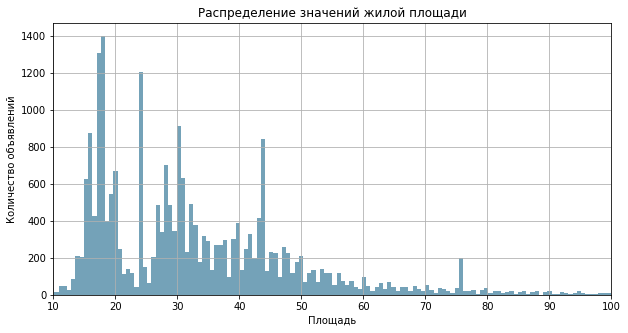

In [ ]:
df['living_area'].hist(bins = 600, figsize = (10, 5), color='#74a2b8')
plt.xlim(10, 100)

plt.title('Распределение значений жилой площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

count    23696.000000
mean        10.392908
std          5.738881
min          0.000000
25%          7.000000
50%          9.000000
75%         11.600000
max        112.000000
Name: kitchen_area, dtype: float64

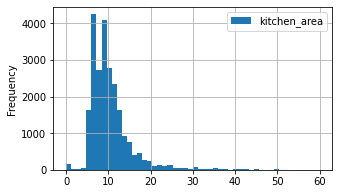

In [ ]:
df.plot(y='kitchen_area', kind='hist', bins=50, range=(0,60),grid=True, figsize=(5,3))
df['kitchen_area'].describe()

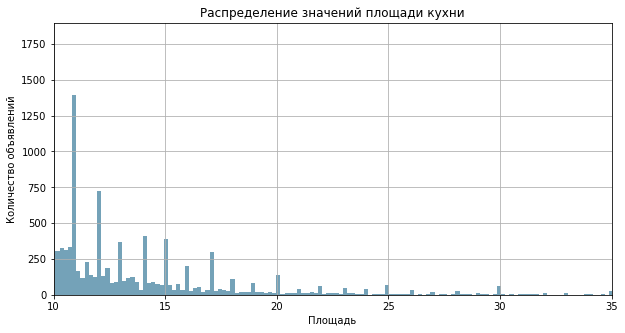

In [ ]:
df['kitchen_area'].hist(bins = 600, figsize = (10, 5), color='#74a2b8')
plt.xlim(10, 35)

plt.title('Распределение значений площади кухни')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

count     23696.000000
mean       6542.048200
std       10887.592501
min         430.000000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

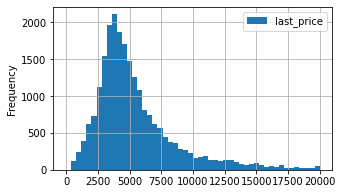

In [ ]:
df.plot(y='last_price', kind='hist', bins=50, range=(0,20000), grid=True, figsize=(5,3))
df['last_price'].describe()

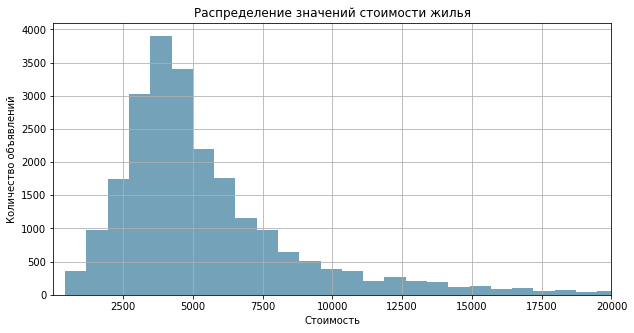

In [ ]:
df['last_price'].hist(bins = 1000, figsize = (10, 5), color='#74a2b8')
plt.xlim(10, 20000)

plt.title('Распределение значений стоимости жилья')
plt.xlabel('Стоимость') 
plt.ylabel('Количество объявлений')
plt.show()

count    23696.000000
mean         2.070687
std          1.078450
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

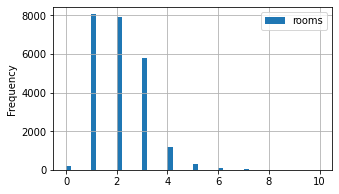

In [ ]:
df.plot(y='rooms', kind='hist', bins=50, range=(0,10),grid=True, figsize=(5,3))
df['rooms'].describe()

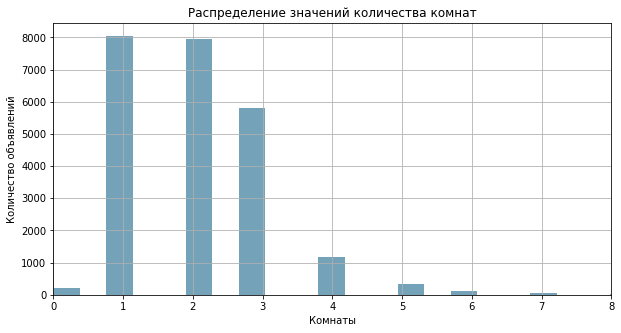

In [ ]:
df['rooms'].hist(bins = 50, figsize = (10, 5), color='#74a2b8')
plt.xlim(0, 8)

plt.title('Распределение значений количества комнат')
plt.xlabel('Комнаты') 
plt.ylabel('Количество объявлений')
plt.show()

count    23696.000000
mean         2.696031
std          0.215620
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

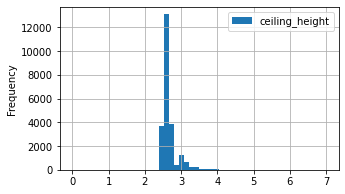

In [ ]:
df.plot(y='ceiling_height', kind='hist', bins=50, range=(0,7),grid=True, figsize=(5,3))
df['ceiling_height'].describe()

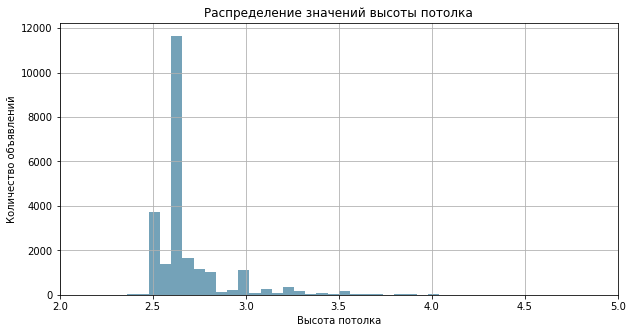

In [ ]:
df['ceiling_height'].hist(bins = 50, figsize = (10, 5), color='#74a2b8')
plt.xlim(2, 5)

plt.title('Распределение значений высоты потолка')
plt.xlabel('Высота потолка') 
plt.ylabel('Количество объявлений')
plt.show()

floor
2     3368
3     3073
1     2917
4     2803
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     177
19     147
21     125
22     113
20     110
23     100
24      63
25      45
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

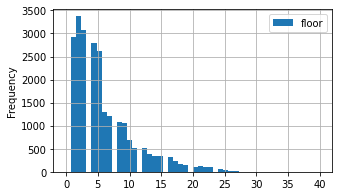

In [ ]:
df.plot(y='floor', kind='hist', bins=50, range=(0,40),grid=True, figsize=(5,3))
df.groupby('floor')['floor'].agg('count').sort_values(ascending=False)

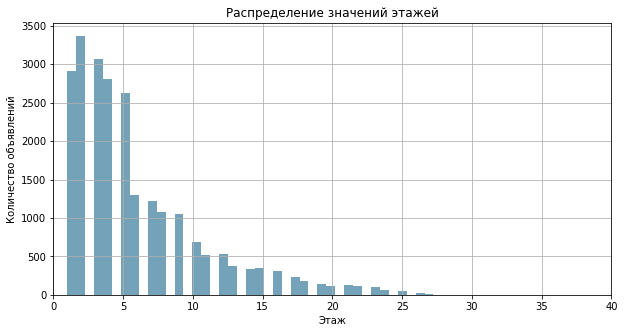

In [ ]:
df['floor'].hist(bins = 50, figsize = (10, 5), color='#74a2b8')
plt.xlim(0, 40)

plt.title('Распределение значений этажей')
plt.xlabel('Этаж') 
plt.ylabel('Количество объявлений')
plt.show()

In [ ]:
df.groupby('floor_type')['floor_type'].agg('count')

floor_type
другой       17439
первый        2917
последний     3340
Name: floor_type, dtype: int64

floors_total
5     5788
9     3847
16    1376
12    1362
4     1200
10    1174
25    1074
6      914
17     833
3      668
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
1       25
35      24
28      21
36       3
29       1
33       1
34       1
37       1
Name: floors_total, dtype: int64

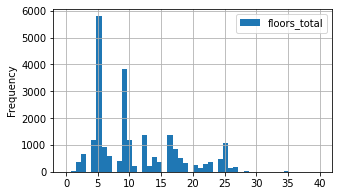

In [ ]:
df.plot(y='floors_total', kind='hist', bins=50, range=(0,40),grid=True, figsize=(5,3))
df.groupby('floors_total')['floors_total'].agg('count').sort_values(ascending=False)

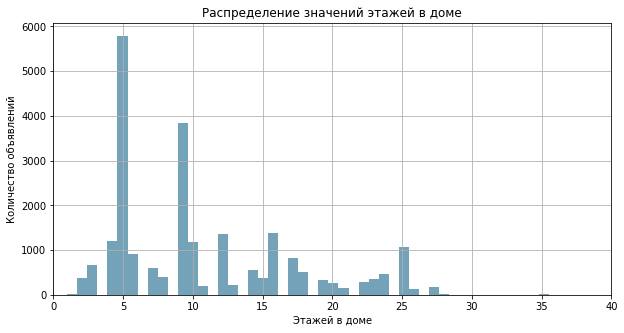

In [ ]:
df['floors_total'].hist(bins = 50, figsize = (10, 5), color='#74a2b8')
plt.xlim(0, 40)

plt.title('Распределение значений этажей в доме')
plt.xlabel('Этажей в доме') 
plt.ylabel('Количество объявлений')
plt.show()

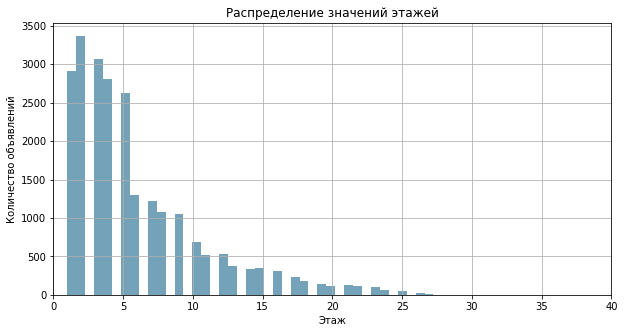

In [ ]:
df['floor'].hist(bins = 50, figsize = (10, 5), color='#74a2b8')
plt.xlim(0, 40)

plt.title('Распределение значений этажей')
plt.xlabel('Этаж') 
plt.ylabel('Количество объявлений')
plt.show()

count    18177.000000
mean        14.183254
std          8.612944
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

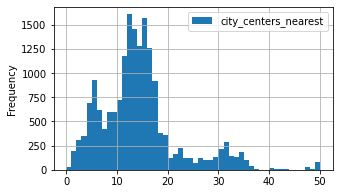

In [ ]:
df.plot(y='city_centers_nearest', kind='hist', bins=50, range=(0,50),grid=True, figsize=(5,3))
df['city_centers_nearest'].describe()

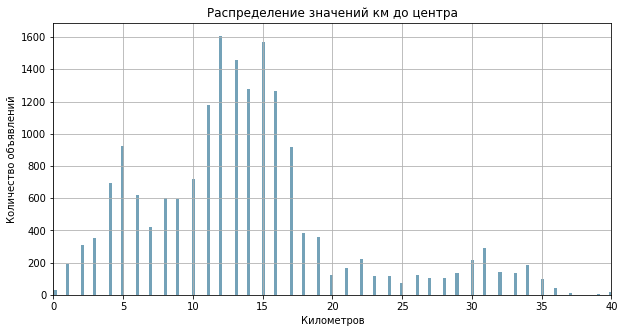

In [ ]:
df['city_centers_nearest'].hist(bins = 300, figsize = (10, 5), color='#74a2b8')
plt.xlim(0, 40)

plt.title('Распределение значений км до центра')
plt.xlabel('Километров') 
plt.ylabel('Количество объявлений')
plt.show()

count    18154.000000
mean     28791.549741
std      12628.343597
min          0.000000
25%      18582.750000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

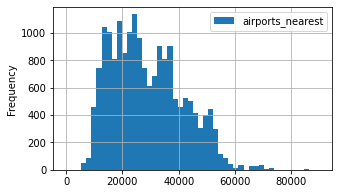

In [ ]:
df.plot(y='airports_nearest', kind='hist', bins=50, range=(0,90000),grid=True, figsize=(5,3))
df['airports_nearest'].describe()

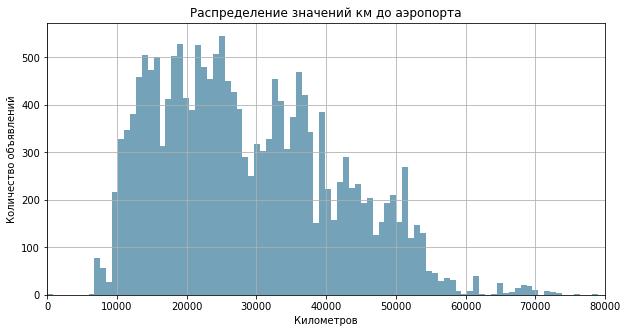

In [ ]:
df['airports_nearest'].hist(bins = 100, figsize = (10, 5), color='#74a2b8')
plt.xlim(0, 80000)

plt.title('Распределение значений км до аэропорта')
plt.xlabel('Километров') 
plt.ylabel('Количество объявлений')
plt.show()

count    8076.000000
mean      490.746657
std       342.343197
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

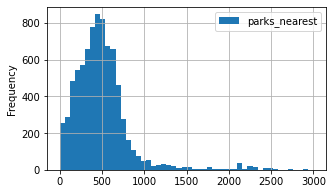

In [ ]:
df.plot(y='parks_nearest', kind='hist', bins=50, range=(0,3000),grid=True, figsize=(5,3))
df['parks_nearest'].describe()

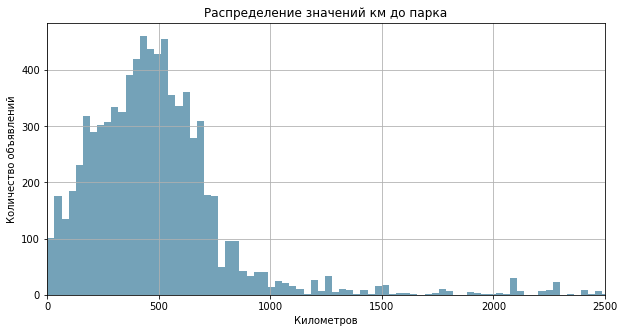

In [ ]:
df['parks_nearest'].hist(bins = 100, figsize = (10, 5), color='#74a2b8')
plt.xlim(0, 2500)

plt.title('Распределение значений км до парка')
plt.xlabel('Километров') 
plt.ylabel('Количество объявлений')
plt.show()

day_week_exposition
0    3611
1    4183
2    3973
3    4294
4    4000
5    1936
6    1699
Name: day_week_exposition, dtype: int64

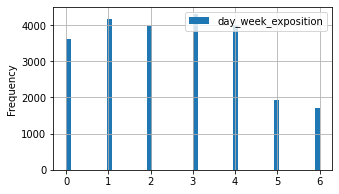

In [ ]:
df.plot(y='day_week_exposition', kind='hist', bins=50, range=(0,6),grid=True, figsize=(5,3))
df.groupby('day_week_exposition')['day_week_exposition'].agg('count')

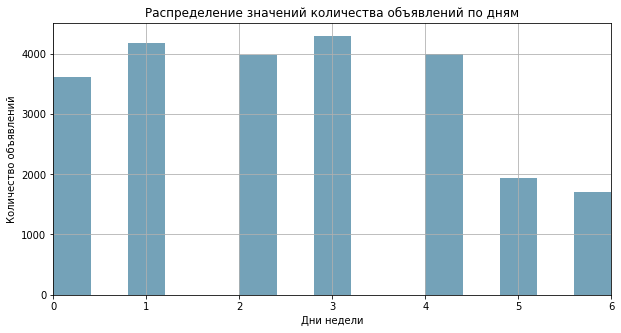

In [ ]:
df['day_week_exposition'].hist(bins = 15, figsize = (10, 5), color='#74a2b8')
plt.xlim(0, 6)

plt.title('Распределение значений количества объявлений по дням')
plt.xlabel('Дни недели') 
plt.ylabel('Количество объявлений')
plt.show()

month_exposition
2     2640
3     2586
4     2379
11    2371
10    2127
9     1980
6     1759
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month_exposition, dtype: int64

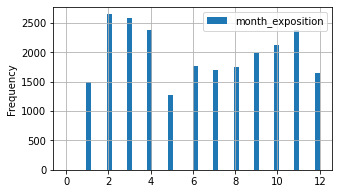

In [ ]:
df.plot(y='month_exposition', kind='hist', bins=50, range=(0,12),grid=True, figsize=(5,3))
df.groupby('month_exposition')['month_exposition'].agg('count').sort_values(ascending=False)

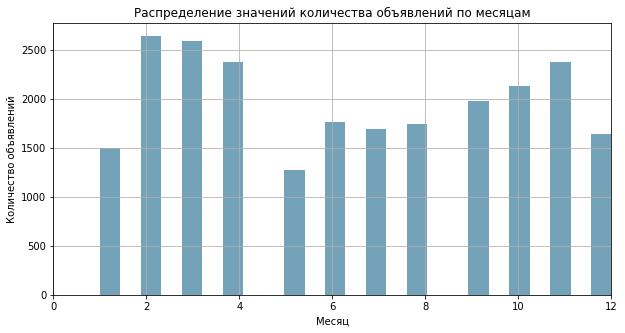

In [ ]:
df['month_exposition'].hist(bins = 25, figsize = (10, 5), color='#74a2b8')
plt.xlim(0, 12)

plt.title('Распределение значений количества объявлений по месяцам')
plt.xlabel('Месяц') 
plt.ylabel('Количество объявлений')
plt.show()

*Наиболее популярны однокомнатные квартиры общей площадью от 30 до 50 кв.м., с жилой площадью от 15 до 40 кв.м. и кухней от 5 до 12 кв.м. Стоимость подобных квартир от 2,5 млн до 5 млн. Средняя высота потолка 2,6 м - золотая середина между сталинскими домами и хрущевсками. Т.к. большее количество домов на данный момент старого фонда (5 и 9 этажей), поэтому преобладают объявления с квартирами с 1го по 9 этаж. Эти дома расположены в основном в радиусе 11 - 18 км от центра. В таких райнах парки находятся в радиусе 700 м. Исходя из данных, самый насыщенный на новые объявления день - четверг. А наибольшее количество новых объявлений в феврале и ноябре.*

**2. Изучите, как быстро продавались квартиры (столбец days_exposition).**

 Этот параметр показывает, сколько дней было размещено каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

count    20515.000000
mean       180.904411
std        219.738665
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

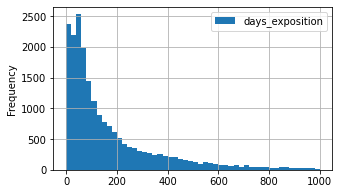

In [ ]:
df.plot(y='days_exposition', kind='hist', bins=50, range=(0,1000),grid=True, figsize=(5,3))
df['days_exposition'].describe()

*Судя по имеющимся данным, медианное время продажи квартиры составляет 95 дней, т.е. около 3 месяцев. Быстрой можно считать продажу, если с момента публикации прошло не более 30 дней. Самые долгие продажи - это обычно не стандартные варианты. Возможно, слишком большая цена или площадь.*

**3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?**


Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

0.6537386648385534

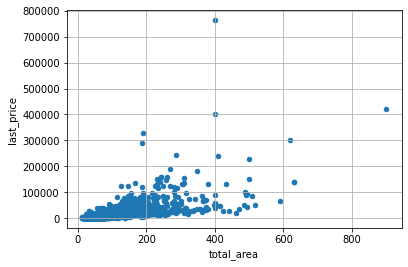

In [ ]:
df.plot(x='total_area', y='last_price', kind='scatter', grid=True) 
df['total_area'].corr(df['last_price'])

*Линейная связь хорошо выражена. Это означает, что с увеличением общей площади увеличивается и общая стоимость квартиры*

0.5632866874034762

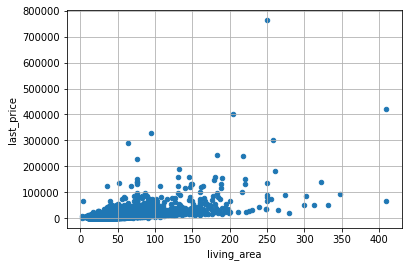

In [ ]:
df.plot(x='living_area', y='last_price', kind='scatter', grid=True) 
df['living_area'].corr(df['last_price'])

*Линейная связь хорошо выражена. Это означает, что с увеличением жилой площади увеличивается и общая стоимость квартиры.*

0.4610879315120617

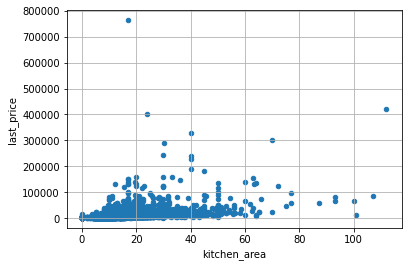

In [ ]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True) 
df['kitchen_area'].corr(df['last_price'])

*Линейная связь слабо выражена. Это означает, что с увеличением площади кухни немного увеличивается и общая стоимость квартиры.*

0.36334192066639

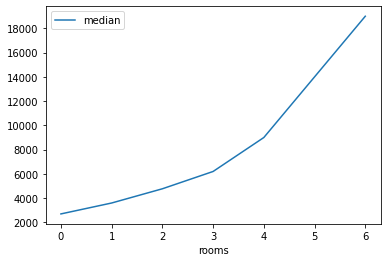

In [ ]:
pt_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
pt_rooms.columns = ['mean', 'median', 'count']
pt_rooms.query('count > 100').plot(y = 'median')
df['rooms'].corr(df['last_price'])

*Общая стоимость квартиры увеличивается с увеличением количества комнат.*

<AxesSubplot:xlabel='floor_type'>

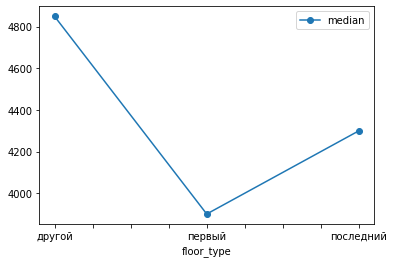

In [ ]:
pt_floor_category = df.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
pt_floor_category.columns = ['mean', 'median', 'count']
pt_floor_category.plot(y = 'median', style='o-')

*График показывает, что наиболее низкая общая стоимость квартир на первом этаже. У квартир на последних этажах, общая стоимость выше, однако наиболее ценятся квартиры со 2го до предпоследнего этажей.*

0.0015304649675100285

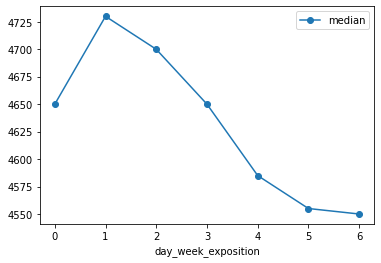

In [ ]:
pt_day_week_exposition = df.pivot_table(index = 'day_week_exposition', values = 'last_price', aggfunc = ['median', 'count'])
pt_day_week_exposition.columns = ['median', 'count']
pt_day_week_exposition.plot(y = 'median', style='o-')
df['day_week_exposition'].corr(df['last_price'])

*Явной взаимосвязи между днем недели размещения и общей стоимостью не нашла.*

0.0027607807157772543

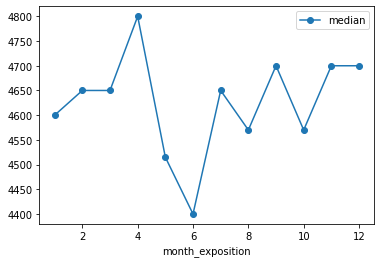

In [ ]:
pt_month_exposition = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['median', 'count'])
pt_month_exposition.columns = ['median', 'count']
pt_month_exposition.plot(y = 'median', style='o-')
df['month_exposition'].corr(df['last_price'])

*На графике видно, что в июне самая небольшая общая медианная стоимость. Однако нет явной линейной зависимости общей стоимости от месяца размещения объявления.*

-0.04304011995078542

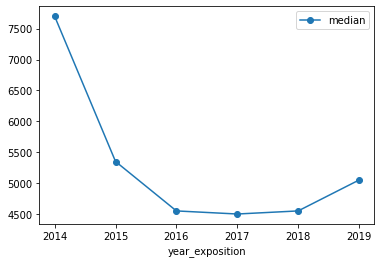

In [ ]:
pt_year_exposition = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['median', 'count'])
pt_year_exposition.columns = ['median', 'count']
pt_year_exposition.plot(y = 'median', style='o-')
df['year_exposition'].corr(df['last_price'])

*На графике виден плавный рост медианной общей стоимости квартиры. Однако прямой линейной зависимости нет.*

**4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.**

In [ ]:
pt_locality = df.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
pt_locality.columns = ['count', 'mean']
pt_locality = pt_locality.sort_values('count', ascending = False).head(10)
pt_locality

,count,mean
locality_name,,
Санкт-Петербург,15719,114.857292
поселок Мурино,556,85.681835
поселок Шушары,440,78.677614
Всеволожск,398,68.654447
Пушкин,369,103.125854
Колпино,338,75.424467
поселок Парголово,327,90.176177
Гатчина,307,68.746319
деревня Кудрово,299,92.473712


*Судя по таблице данных, дешевле всего купить кв. м. в городе Выборг, он же находится на 10 месте по численности объявлений. Наибольшее количество объявлений, естественно, в Санкт-Петербурге, а стоимость кв. м., в среднем, в два раза выше, чем в Выборге.*

**5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

,price_per_meter
city_centers_nearest,
0,245.834074
1,177.005469
2,157.848806
3,121.387400
4,133.282718
5,140.509859
6,151.012184
7,156.176786
8,125.671407


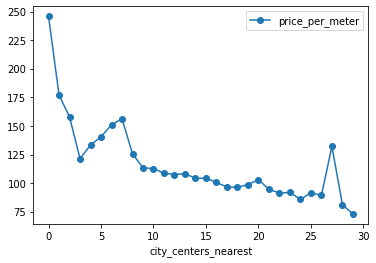

In [ ]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(500)
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int')
pt_center = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest !=500').pivot_table(index = 'city_centers_nearest', values = 'price_per_meter', aggfunc = 'mean')
pt_center.plot(style='o-')
pt_center

*На графике, как и в таблице, видна прямая связь между количеством километров до центра и стоимостью кв. м. Это хороший пример отрицательной линейной корреляции.*

**Шаг 5. Напишите общий вывод
Опишите полученные результаты и зафиксируйте основной вывод проведённого исследования.**

*Перед тем, как исследовать закономерности, я "почистила" данные: нашла и заменила пропущенны значения на средние или медианные значения, обнаружила и исправила аномальные значения, поработала с дубликатами, исправила типы данных для некоторых полей. После того, как данные были готовы, я добавила несколько полей с дополнительной информацией, такой как: цена одного квадратного метра,
день недели, месяц и год публикации объявления, тип этажа квартиры («‎первый», «последний», «другой»), расстояние до центра города в километрах. Далее я тщательно, с помощью гистограмм и цифровых графиков изучила данные каждого поля и на основании этого исследования составила "портрет" среднестатистической квартиры. Это однокомнатная квартира, общей площадью 45 кв.м., жилой площадью 18 кв.м. и кухней 11 кв.м. Высота потолков составляет 2,65м. Стоимость такой квартиры около 4 млн. рублей. Среднее время продажи квартиры - 95 дней. В выходные объявлений меньше, чем в будние дни.*